In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = np.zeros((300,300))
img2 = np.zeros((300,300))
img1[50:120,50:100] = 255
img2[120:190,20:70] = 255

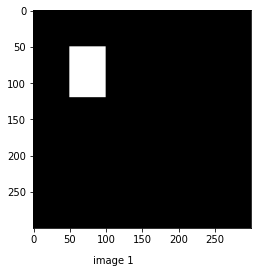

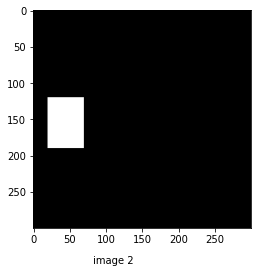

In [48]:
plt.imshow(img1,cmap='gray')
plt.figtext(0.4,0,'image 1')
plt.show()
plt.imshow(img2,cmap='gray')
plt.figtext(0.4,0,'image 2')
plt.show()

Text(0.4, 0, 'FFT of image')

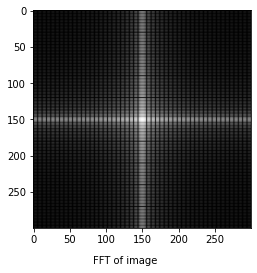

In [49]:
#img1 = img1/255.0
f1 = np.fft.fft2(np.int32(img1))
f_shift1 = np.fft.fftshift(f1)
f_complex1 = f_shift1#f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs1 = np.abs(f_complex1) + 1 # lie between 1 and 1e6
f_bounded1 = 20 * np.log(f_abs1)
f_img1 = f_bounded1 / np.max(f_bounded1)
f_img1 = f_img1.astype(np.float32)
plt.imshow(f_img1, cmap='gray')
plt.figtext(0.4,0,'FFT of image')

Text(0.4, 0, 'FFT of image 2')

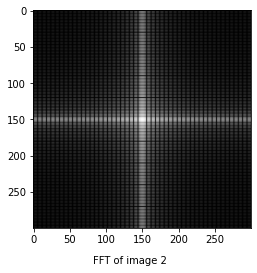

In [50]:
#img2 = img2/255.0
f2 = np.fft.fft2(np.int32(img2))
f_shift2 = np.fft.fftshift(f2)
f_complex2 = f_shift2
f_abs2 = np.abs(f_complex2) + 1 # lie between 1 and 1e6
f_bounded2 = 20 * np.log(f_abs2)
f_img2 = f_bounded2 / np.max(f_bounded2)
f_img2 = f_img2.astype(np.float32)
plt.imshow(f_img2, cmap='gray')
plt.figtext(0.4,0,'FFT of image 2')

Text(0.4, 0, 'cross correlated fft')

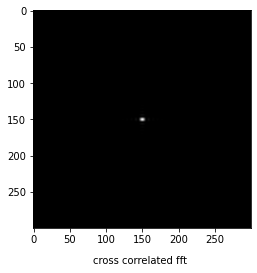

In [51]:
f_prod = f_complex1*np.conj(f_complex2)
f_prod = f_prod/np.sqrt(np.sum(np.abs(f_prod)**2))
#f_prod = (f_prod - np.min(f_prod))/(np.max(f_prod)-np.min(f_prod))
f_prodabs = np.abs(f_prod)+1 # lie between 1 and 1e6
f_prodbounded = 20*np.log(f_prodabs)
f_prodimg = f_prodbounded / np.max(f_prodbounded)
f_prodimg = f_prodimg.astype(np.float32)
plt.imshow(f_prodimg, cmap='gray')
plt.figtext(0.4,0,'cross correlated fft')

In [52]:
a = np.angle(f_prod[151,151])
b = np.angle(f_prod[149,151])
tx = (a+b)/(4*np.pi)
ty = (a-b)/(4*np.pi)

Taking two points on fft for calculation of translation.tx,ty

In [46]:
tx*300

-30.0

tx value

In [47]:
ty*300

70.00000000000001

ty value